# **Домашнее задание 7: Fraud Detection Competition**

Добро пожаловать на финальное домашнее задание курса! Домашнее задание направлено на систематизацию всех знаний, полученных в процессе учебы.

В нём Вы потренируетесь применять навыки построения пайплайнов машинного обучения, приобретенные в курсе от точки разведочного анализа данных до построения и валидации моделей машинного обучения.

## **Задача**
**Вы будете решать задачу определения фрода:**

https://www.kaggle.com/competitions/fraud-detection-24

**Вам нужно будет:**
- в jupyter notebook провести исследование данных;
- в нём же построить модели и оценить их качество;
- отправить посылку на Kaggle.

Более подробное описание шагов - в ноутбуке ниже.

## **Оценивание и баллы**
- В EDA и во всей работе будут оцениваться полнота и **выводы**;
- При обучении моделей старайтесь обоснованно подходить к их выбору, избегая простого перебора;

**Максимальный балл** - 10 (+ бонусы за Kaggle, см. ниже).


Мягкий дедлайн (окончание соревнования на Kaggle): **15 марта 23:59**


# **Базовое решение и пример формирования файла под submission**


In [1]:
# !wget --no-check-certificate 'https://www.dropbox.com/s/5iuef7c9ljj84t6/train_transaction.csv?dl=0' -O train_transaction.csv
# !wget --no-check-certificate 'https://www.dropbox.com/s/cmy01z5fw7ohlmd/train_identity.csv?dl=0' -O train_identity.csv
# !wget --no-check-certificate 'https://www.dropbox.com/s/7thqkuxnwsa7njj/test_transaction.csv?dl=0' -O test_transaction.csv
# !wget --no-check-certificate 'https://www.dropbox.com/s/b40nvbb9e2usd5w/test_identity.csv?dl=0' -O test_identity.csv
# !wget --no-check-certificate 'https://www.dropbox.com/s/arkyoz0bel8z4d2/sample_submission.csv?dl=0' -O sample_submission.csv

--2025-03-10 18:36:37--  https://www.dropbox.com/s/5iuef7c9ljj84t6/train_transaction.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/puoen4suxjebjteenuwtm/train_transaction.csv?rlkey=madfflananln1b7qysdq8c54q&dl=0 [following]
--2025-03-10 18:36:37--  https://www.dropbox.com/scl/fi/puoen4suxjebjteenuwtm/train_transaction.csv?rlkey=madfflananln1b7qysdq8c54q&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘train_transaction.csv’

train_transaction.c     [ <=>                ] 157.48K   847KB/s    in 0.2s    

2025-03-10 18:36:38 (847 KB/s) - ‘train_transaction.csv’ saved [161257]

--2025-03-10 18:36:38--  https://www.dropbox.com/s/cmy01z5fw7ohlmd/train_identity.csv?dl=0
Resol

### **Примечания:**

**1. Оценка качества и Submission File**
- Ответом является число от 0 до 1, метрикой качества - AUC-ROC.
- Структура Submission File:
 - для каждого значения *TransactionID* в тестовых данных вы должны предсказать **вероятность** для столбца *isFraud*.
 - в файле у вас должно быть две колонки: `TransactionID` и`isFraud`  **для каждой транзакции в датасете**.

**2. Объем данных**

Поскольку набор данных объемный, могут быть проблемы с переполнением памяти в Collab. Для решения проблемы можете использовать функцию из [этого ноутбука](https://colab.research.google.com/drive/18u75eyFGEoyeWJ_MbsLkcPa6gv2tNI8G#scrollTo=V2L1Nl5CTMMl), разобравшись, что она делает с данными.

# **Задание 1 (2 балла)**

Проведите EDA (разведочный анализ данных):
* проанализируйте признаки, их особенности и связь с целевой переменной
* проанализируйте целевую переменную
* оцените степень попарной взаимосвязи признаков, а также связи признаков и целевой переменной
* по результатам исследований сделайте необходимую обработку данных (удаление дублей, работа с пропусками, с категориальными столбцами (если они есть), работа с аномалиями, другие преобразования признаков)

Важно, что EDA всегда сопровождается выводами - не забудьте об этом.

In [1]:
!pip install category_encoders catboost lightgbm optuna phik pyod hdbscan -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 66.1 MB/s eta 0:00:00ta 0:00:01


In [2]:
!pip install --upgrade TPOT

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.0/214.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 102.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.5 MB/s eta 0:00:00
  Created wheel for configspace: filename=configspace-1.2.1-py3-none-any.whl size=115950 sha256=72f1fdcd220368f1eecdc68c1542dbdc3463e32ae33add31538c6e52185ae100
  Stored in dir

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import optuna
import lightgbm as lgb

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from category_encoders import TargetEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.metrics import make_scorer, roc_auc_score, make_scorer
from catboost import CatBoostClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans, DBSCAN
from tpot import TPOTClassifier

In [4]:
train_transaction = pd.read_csv('/kaggle/input/hw7-data/train_transaction.csv')
train_identity = pd.read_csv('/kaggle/input/hw7-data/train_identity.csv')
test_transaction = pd.read_csv('/kaggle/input/hw7-data/test_transaction.csv')
test_identity = pd.read_csv('/kaggle/input/hw7-data/test_identity.csv')

merged_df = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

In [5]:
merged_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [14]:
merged_df.shape

(417559, 434)

## 1.1. Проверка пропусков

In [15]:
merged_df.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             309286
id_37             309286
id_38             309286
DeviceType        309435
DeviceInfo        325600
Length: 434, dtype: int64

In [16]:
missing_percentage = merged_df.isna().mean() * 100
missing_percentage[missing_percentage > 50].index

Index(['dist1', 'dist2', 'R_emaildomain', 'D5', 'D6', 'D7', 'D8', 'D9', 'D11',
       'D12',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=229)

Видно, что значительная доля колонок имеет более 50% пропусков в данных.

In [17]:
merged_df['V330'].value_counts()

V330
0.0     59682
1.0      3983
2.0      1263
3.0       451
4.0       158
5.0        73
11.0       43
6.0        38
8.0        30
7.0        22
10.0       18
9.0        12
14.0        7
12.0        4
13.0        3
15.0        1
Name: count, dtype: int64

In [18]:
merged_df['V335'].value_counts()

V335
0.0       59637
100.0       698
50.0        678
150.0       331
25.0        314
          ...  
860.0         1
408.0         1
67.0          1
622.0         1
1168.0        1
Name: count, Length: 546, dtype: int64

In [19]:
merged_df['V338'].value_counts()

V338
0.0      59245
100.0     1039
200.0      666
50.0       588
150.0      504
         ...  
387.0        1
352.0        1
337.0        1
29.0         1
515.0        1
Name: count, Length: 219, dtype: int64

Учитывая высокую долю пропусков их удаление приведет к существенной потере данных и ухудшению каества модели. Целесообразно использовать модели машинного обучения, которые хорошо справляются с пропусками в данных (модели на основе решающих деревьев, бустинги)

## 1.2. Проверка дубликатов

In [20]:
merged_df.duplicated().sum()

0

In [21]:
merged_df.drop('isFraud', axis=1).duplicated().sum()

0

Дубликаты отсутствуют.

## 1.3. Анализ целевой переменной

<Axes: >

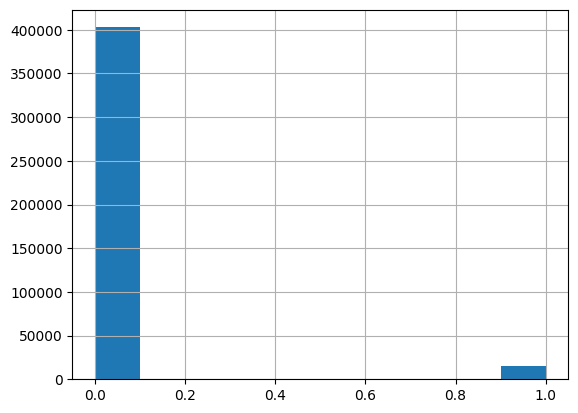

In [22]:
merged_df.isFraud.hist()

In [23]:
merged_df.isFraud.value_counts()

isFraud
0    402838
1     14721
Name: count, dtype: int64

Видим, что присутствует существенный дисбаланс классов, что наверное логично (поскольку большинство транзакций всё-таки должны быть нефродовыми). В этой связи метрика Accuracy не подходит для оценки модели. Вместо этого стоит использовать ROC-AUC, которая объединяет преимущества Precision и Recall, но при этом не зависит от выбранного порога.

## 1.4. Анализ категориальных признаков

In [24]:
merged_df.select_dtypes(include=['object']).columns

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')

In [25]:
merged_df.describe(include='object')

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,417559,416730,416733,352649,103820,194116,194116,194116,215646,165564,...,62096,107961,57819,62168,108273,108273,108273,108273,108124,91959
unique,5,4,4,59,60,2,2,2,3,2,...,71,110,183,4,2,2,2,2,2,1551
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,...,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows
freq,301297,272753,306554,160974,43010,194098,173868,152682,136257,91343,...,16078,21821,13466,46931,62152,102536,84398,57779,66324,36841


In [26]:
binary_cols = [col for col in merged_df.columns if
               set(str(x).upper() for x in merged_df[col].dropna().unique()) == {'F', 'T'}]

binary_cols

['M1',
 'M2',
 'M3',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'id_35',
 'id_36',
 'id_37',
 'id_38']

Переменные М1-М3, М5-М9, id_35-id_38 можно закодировать как 1 и 0 (посольку принимает значения только T и F). Для ProductCD, card4, card6, M4 - можно попробовать OHE, поскольку количество категорий невелико. Для переменных P_emaildomain, R_emaildomain видимо целесообразно использовать target encoder.

In [27]:
ohe_cols = ['ProductCD', 'card4', 'card6', 'M4']
target_cols = ['P_emaildomain', 'R_emaildomain']

In [28]:
binary_transformer = Pipeline(steps=[
    ('label_encoder', LabelEncoder())
])

ohe_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

target_transformer = Pipeline(steps=[
    ('target_encoder', TargetEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('binary', binary_transformer, binary_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('target', target_transformer, target_cols)
    ]
)

## 1.5. Оценка корреляций

interval columns not set, guessing: ['TransactionAmt', 'TransactionDT']


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


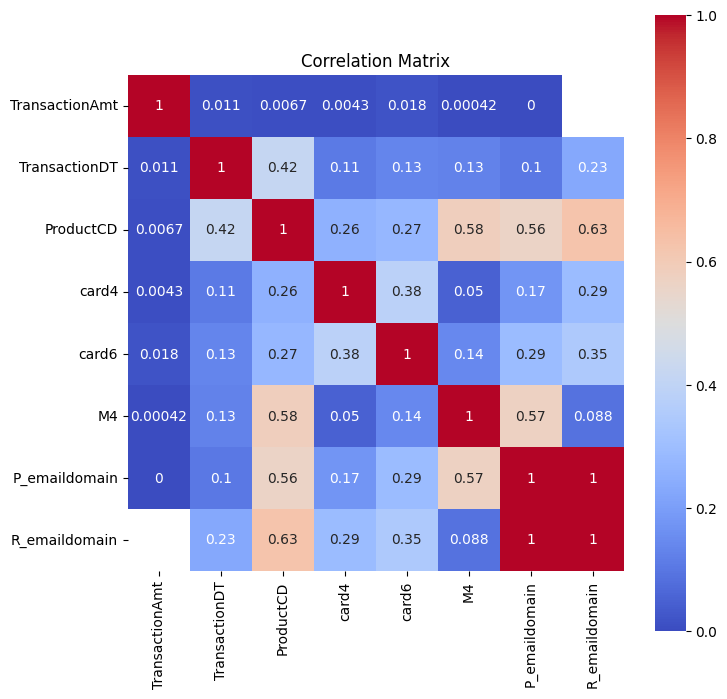

In [29]:
correlation_matrix = merged_df[['TransactionAmt', 'TransactionDT',
                                        'ProductCD', 'card4', 'card6', 'M4',
                                        'P_emaildomain', 'R_emaildomain']].phik_matrix()

plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

 Видим практически полную корреляцию между 'P_emaildomain', 'R_emaildomain', а также высокую корреляцию этих признаков с ProductCD

# **Задание 2 (3 балла)**

Обучите несколько ML-моделей для решения поставленной задачи.
Оцените их качество двумя способами:

1) на кросс-валидации

2) на лидерборде

Подберите число фолдов на кросс-валидации так, чтобы метрики, которые вы видите, были максимально близки на кросс-валидации и на лидерборде.

По результатам экспериментов постройте таблицу:
* в каждой строке таблицы - результаты одной модели
* по столбцам: качество на кросс-валидации, качество на лидерборде, модель с гиперпараметрами
Полученную таблицу вставьте картинкой прямо в ноутбук после ячеек с кодом. Сделайте текстовые выводы.

In [5]:
X_train = merged_df.drop('isFraud', axis=1)
y_train = merged_df['isFraud'].values

X_train.iloc[:, 5] = X_train.iloc[:, 5].astype(float)
X_train.loc[:, X_train.select_dtypes(include=['object']).columns] = X_train.select_dtypes(include=['object']).fillna("unknown")

X_test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')
X_test.loc[:, X_test.select_dtypes(include=['object']).columns] = X_test.select_dtypes(include=['object']).fillna("unknown")

transact_ids_test = X_test['TransactionID']

X_train.drop('TransactionID', axis=1, inplace=True)
X_test.drop('TransactionID', axis=1, inplace=True)

## 2.1. CatBoost (минимальная оптимизация)

In [33]:
def optimize_catboost(trial, X_train, y_train):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 2, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 10.0, log=True),
        'task_type': 'GPU', 
        'devices': '0:1',
        'verbose': 0
    }

    cat_features = X_train.select_dtypes(include=['object']).columns.tolist()
    
    cat_features_indices = [X_train.columns.get_loc(col) for col in cat_features]

    model = CatBoostClassifier(**params, cat_features=cat_features_indices)

    roc_auc_scorer = make_scorer(roc_auc_score)

    scores = cross_val_score(model, X_train, y_train, cv=4, scoring=roc_auc_scorer)

    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: optimize_catboost(trial, X_train, y_train), n_trials=2)

best_params = study.best_params
best_score = study.best_value

print("Best parameters:", best_params)
print("Best average ROC AUC:", best_score)

[I 2025-03-01 15:12:00,191] A new study created in memory with name: no-name-74ee64ee-0b51-4b0c-a14d-ff514e4f3adc
[I 2025-03-01 15:13:11,504] Trial 0 finished with value: 0.6589031436285877 and parameters: {'iterations': 642, 'depth': 2, 'learning_rate': 0.05515192806494982, 'l2_leaf_reg': 0.7716308717835568}. Best is trial 0 with value: 0.6589031436285877.
[I 2025-03-01 15:15:33,322] Trial 1 finished with value: 0.7111814196006772 and parameters: {'iterations': 755, 'depth': 4, 'learning_rate': 0.14139986509396638, 'l2_leaf_reg': 4.589642770072438}. Best is trial 1 with value: 0.7111814196006772.


Best parameters: {'iterations': 755, 'depth': 4, 'learning_rate': 0.14139986509396638, 'l2_leaf_reg': 4.589642770072438}
Best average ROC AUC: 0.7111814196006772


In [43]:
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()
    
cat_features_indices = [X_train.columns.get_loc(col) for col in cat_features]

best_model = CatBoostClassifier(**best_params, cat_features=cat_features_indices, task_type = 'GPU', devices = '0:1', verbose = 0)

best_model.fit(X_train, y_train)

y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [51]:
results_df = pd.DataFrame({
    'TransactionID': X_test['TransactionID'],
    'isFraud': y_pred_proba
})

In [53]:
results_df.to_csv('predictions.csv', index=False)

In [54]:
# pr = pd.read_csv('predictions.csv')

## 2.2. Catboost (глубокая оптимизация)

In [58]:
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: optimize_catboost(trial, X_train, y_train), n_trials=20)

best_params = study.best_params
best_score = study.best_value

print("Best parameters:", best_params)
print("Best average ROC AUC:", best_score)

[I 2025-03-01 15:47:41,545] A new study created in memory with name: no-name-a20ea8e2-82fb-4163-8831-dbd341db12b9
[I 2025-03-01 15:48:45,972] Trial 0 finished with value: 0.6904514301138148 and parameters: {'iterations': 240, 'depth': 4, 'learning_rate': 0.6314260411715743, 'l2_leaf_reg': 3.5868029909923234}. Best is trial 0 with value: 0.6904514301138148.
[I 2025-03-01 15:50:33,023] Trial 1 finished with value: 0.6574833635841193 and parameters: {'iterations': 714, 'depth': 3, 'learning_rate': 0.02100419395960808, 'l2_leaf_reg': 1.0521575137332995}. Best is trial 0 with value: 0.6904514301138148.
[I 2025-03-01 15:51:08,238] Trial 2 finished with value: 0.675070150597618 and parameters: {'iterations': 109, 'depth': 6, 'learning_rate': 0.12371537589224801, 'l2_leaf_reg': 0.27721357139156183}. Best is trial 0 with value: 0.6904514301138148.
[I 2025-03-01 15:51:56,070] Trial 3 finished with value: 0.6057988461022606 and parameters: {'iterations': 303, 'depth': 2, 'learning_rate': 0.020514

Best parameters: {'iterations': 866, 'depth': 7, 'learning_rate': 0.23944547498558189, 'l2_leaf_reg': 4.592505603014628}
Best average ROC AUC: 0.7163963349982532


In [72]:
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()
    
cat_features_indices = [X_train.columns.get_loc(col) for col in cat_features]

best_model = CatBoostClassifier(**best_params, cat_features=cat_features_indices, task_type = 'GPU', devices = '0:1', verbose = 0)

best_model.fit(X_train, y_train)

y_pred_proba = best_model.predict_proba(X_test)[:, 1]

results_df = pd.DataFrame({
    'TransactionID': X_test['TransactionID'],
    'isFraud': y_pred_proba
})

results_df.to_csv('predictions_deep.csv', index=False)

## 2.3. LightGBM (минимальная оптимизация)

In [7]:
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()

column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough' 
)

X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [21, 22, 23, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [33]:
def optimize_lightgbm(trial, X_train_encoded, y_train):
    model = Pipeline(steps=[
        ('classifier', lgb.LGBMClassifier(
            objective='binary',
            metric='auc',
            boosting_type='gbdt',
            iterations=trial.suggest_int('iterations', 100, 1000),
            max_depth=trial.suggest_int('max_depth', 2, 10),
            learning_rate=trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
            lambda_l2=trial.suggest_float('lambda_l2', 0.1, 10.0, log=True),
            verbose=-1,
            device='gpu',
            gpu_device_id=0
        ))
    ])
    
    roc_auc_scorer = make_scorer(roc_auc_score)

    scores = cross_val_score(model, X_train_encoded, y_train, cv=4, scoring=roc_auc_scorer)

    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: optimize_lightgbm(trial, X_train_encoded, y_train), n_trials=2)

best_params = study.best_params
best_score = study.best_value

print("Best parameters:", best_params)
print("Best average ROC AUC:", best_score)

[I 2025-03-08 06:14:47,413] A new study created in memory with name: no-name-d7c988ee-81ea-4a30-b971-3d817b4f8ad0
[I 2025-03-08 06:15:42,214] Trial 0 finished with value: 0.6336690553222855 and parameters: {'iterations': 725, 'max_depth': 9, 'learning_rate': 0.01914933560512989, 'lambda_l2': 0.21490866160638317}. Best is trial 0 with value: 0.6336690553222855.
[I 2025-03-08 06:16:35,396] Trial 1 finished with value: 0.6719470765085235 and parameters: {'iterations': 511, 'max_depth': 8, 'learning_rate': 0.041819960795106706, 'lambda_l2': 9.76625834800116}. Best is trial 1 with value: 0.6719470765085235.


Best parameters: {'iterations': 511, 'max_depth': 8, 'learning_rate': 0.041819960795106706, 'lambda_l2': 9.76625834800116}
Best average ROC AUC: 0.6719470765085235


In [35]:
best_model = lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    boosting_type='gbdt',
    iterations=best_params['iterations'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    lambda_l2=best_params['lambda_l2'],
    verbose=-1,
    device='gpu',
    gpu_device_id=0
)

best_model.fit(X_train_encoded, y_train)

y_pred_proba = best_model.predict_proba(X_test_encoded)[:, 1]

results_df = pd.DataFrame({
    'TransactionID': transact_ids_test,
    'isFraud': y_pred_proba
})

results_df.to_csv('predictions_mini_lgb.csv', index=False)

## 2.4. LightGBM (глубокая оптимизация)

In [8]:
def optimize_lightgbm(trial, X_train_encoded, y_train):
    model = Pipeline(steps=[
        ('classifier', lgb.LGBMClassifier(
            objective='binary',
            metric='auc',
            boosting_type='gbdt',
            iterations=trial.suggest_int('iterations', 100, 1000),
            max_depth=trial.suggest_int('max_depth', 2, 10),
            learning_rate=trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
            lambda_l2=trial.suggest_float('lambda_l2', 0.1, 10.0, log=True),
            verbose=-1,
            device='gpu',
            gpu_device_id=0
        ))
    ])
    
    roc_auc_scorer = make_scorer(roc_auc_score)

    scores = cross_val_score(model, X_train_encoded, y_train, cv=4, scoring=roc_auc_scorer)

    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: optimize_lightgbm(trial, X_train_encoded, y_train), n_trials=40)

best_params = study.best_params
best_score = study.best_value

print("Best parameters:", best_params)
print("Best average ROC AUC:", best_score)

[I 2025-03-08 12:12:57,649] A new study created in memory with name: no-name-7ee8ad93-b828-4eb1-b15e-1c24a77a67a2
[I 2025-03-08 12:13:37,839] Trial 0 finished with value: 0.6519597799231787 and parameters: {'iterations': 592, 'max_depth': 2, 'learning_rate': 0.10000619523358495, 'lambda_l2': 0.19218925444484913}. Best is trial 0 with value: 0.6519597799231787.
[I 2025-03-08 12:14:23,295] Trial 1 finished with value: 0.6703322437405466 and parameters: {'iterations': 370, 'max_depth': 8, 'learning_rate': 0.3836235861083689, 'lambda_l2': 0.28163989535986667}. Best is trial 1 with value: 0.6703322437405466.
[I 2025-03-08 12:15:08,994] Trial 2 finished with value: 0.6934112353133407 and parameters: {'iterations': 636, 'max_depth': 6, 'learning_rate': 0.11572643577539486, 'lambda_l2': 1.7710108028011242}. Best is trial 2 with value: 0.6934112353133407.
[I 2025-03-08 12:15:56,991] Trial 3 finished with value: 0.6831838823413774 and parameters: {'iterations': 955, 'max_depth': 7, 'learning_rat

Best parameters: {'iterations': 226, 'max_depth': 5, 'learning_rate': 0.40641774614548076, 'lambda_l2': 4.723952755844436}
Best average ROC AUC: 0.6985950910541366


In [9]:
best_model = lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    boosting_type='gbdt',
    iterations=best_params['iterations'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    lambda_l2=best_params['lambda_l2'],
    verbose=-1,
    device='gpu',
    gpu_device_id=0
)

best_model.fit(X_train_encoded, y_train)

y_pred_proba = best_model.predict_proba(X_test_encoded)[:, 1]

results_df = pd.DataFrame({
    'TransactionID': transact_ids_test,
    'isFraud': y_pred_proba
})

results_df.to_csv('predictions_deep_lgb.csv', index=False)

Рассмотрим основные результаты моделирования:

| Модель                            | Скор на кросс-валидации | Скор на лидерборде |
|-----------------------------------|-------------------------|---------------------|
| Catboost (мин. оптимизация)       | 0.71                    | 0.88                |
| Catboost (глубокая оптимизация)   | 0.72                    | 0.88                |
| LightGBM (мин оптимизация)        | 0.67                    | 0.88                |
| LightGBM (глубокая оптимизация)   | 0.68                    | 0.89                |

# **Задание 3 (2 балла)**

Попробуйте подойти к задаче как к поиску аномалий.

1) Поищите аномалии (фрод) различными рассмотренными в курсе методами и сделайте прогноз на тестовых данных.

Результатом также будет таблица:
* по строкам - методы поиска аномалий
* по столбцам - качество вашего решения на leaderboard

2) Попробуйте встроить поиск аномалий и их удаление в ML-пайплайн: найдите аномалии и что-нибудь с ними сделайте до обучения моделей (можно удалить их, а можно использовать в качестве дополнительных признаков - попробуйте разные стратегии). Результат проверьте на кросс-валидации и на лидерборде, сделайте выводы.

In [6]:
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()

column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough' 
)

X_train_encoded = column_transformer.fit_transform(X_train.fillna(-1))
X_test_encoded = column_transformer.transform(X_test)

model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_train_encoded)

X_anomaly = model.predict(X_train_encoded)

mask = X_anomaly == 1

X_train_filtered = X_train_encoded[mask]
y_train_filtered = y_train[mask]

def optimize_lightgbm(trial, X_train_encoded, y_train):
    model = Pipeline(steps=[
        ('classifier', lgb.LGBMClassifier(
            objective='binary',
            metric='auc',
            boosting_type='gbdt',
            iterations=trial.suggest_int('iterations', 100, 1000),
            max_depth=trial.suggest_int('max_depth', 2, 10),
            learning_rate=trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
            lambda_l2=trial.suggest_float('lambda_l2', 0.1, 10.0, log=True),
            verbose=-1,
            device='gpu',
            gpu_device_id=0
        ))
    ])
    
    roc_auc_scorer = make_scorer(roc_auc_score)

    scores = cross_val_score(model, X_train_encoded, y_train, cv=4, scoring=roc_auc_scorer)

    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: optimize_lightgbm(trial, X_train_filtered, y_train_filtered), n_trials=15)

best_params = study.best_params
best_score = study.best_value

print("Best parameters:", best_params)
print("Best average ROC AUC:", best_score)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [21, 22, 23, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
[I 2025-03-10 18:11:47,529] A new study created in memory with name: no-name-7d0c3dcf-248a-454c-9216-89a97369c1df
[I 2025-03-10 18:12:29,529] Trial 0 finished with value: 0.6417505126688512 and parameters: {'iterations': 1000, 'max_depth': 3, 'learning_rate': 0.4602286505603979, 'lambda_l2': 0.10942640777926155}. Best is trial 0 with value: 0.6417505126688512.
[I 2025-03-10 18:13:11,859] Trial 1 finished with value: 0.6247465007902486 and parameters: {'iterations': 297, 'max_depth': 5, 'learning_rate': 0.07827520381103421, 'lambda_l2': 0.5395487050912315}. Best is trial 0 with value: 0.6417505126688512.
[I 2025-03-10 18:14:00,234] Trial 2 finished with value: 0.5538206756583839 and parameters: {'iterations': 906, 'max_depth': 10, 'learning_rate': 0.019884

Best parameters: {'iterations': 470, 'max_depth': 4, 'learning_rate': 0.45295213742989654, 'lambda_l2': 1.1539326455062082}
Best average ROC AUC: 0.6570053317006027


In [7]:
best_model = lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    boosting_type='gbdt',
    iterations=best_params['iterations'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    lambda_l2=best_params['lambda_l2'],
    verbose=-1,
    device='gpu',
    gpu_device_id=0
)

best_model.fit(X_train_encoded, y_train)

y_pred_proba = best_model.predict_proba(X_test_encoded)[:, 1]

results_df = pd.DataFrame({
    'TransactionID': transact_ids_test,
    'isFraud': y_pred_proba
})

results_df.to_csv('predictions_deep_lgb_anomaly.csv', index=False)

In [8]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN

train_transaction = pd.read_csv('/kaggle/input/hw7-data/train_transaction.csv')
train_identity = pd.read_csv('/kaggle/input/hw7-data/train_identity.csv')
test_transaction = pd.read_csv('/kaggle/input/hw7-data/test_transaction.csv')
test_identity = pd.read_csv('/kaggle/input/hw7-data/test_identity.csv')

merged_df = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

X_train = merged_df.drop('isFraud', axis=1)
y_train = merged_df['isFraud'].values

X_train.iloc[:, 5] = X_train.iloc[:, 5].astype(float)
X_train.loc[:, X_train.select_dtypes(include=['object']).columns] = X_train.select_dtypes(include=['object']).fillna("unknown")

X_test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')
X_test.loc[:, X_test.select_dtypes(include=['object']).columns] = X_test.select_dtypes(include=['object']).fillna("unknown")

transact_ids_test = X_test['TransactionID']

X_train.drop('TransactionID', axis=1, inplace=True)
X_test.drop('TransactionID', axis=1, inplace=True)

cat_features = X_train.select_dtypes(include=['object']).columns.tolist()

column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough' 
)

X_train_encoded = column_transformer.fit_transform(X_train.fillna(-1))
X_test_encoded = column_transformer.transform(X_test)

y_train_values = np.array(y_train)

class_1_indices = np.where(y_train_values == 1)[0]
class_0_indices = np.where(y_train_values == 0)[0]

np.random.shuffle(class_0_indices)

n_class_1 = len(class_1_indices)
n_class_0_needed = min(len(class_0_indices), 3 * n_class_1)

selected_class_0_indices = class_0_indices[:n_class_0_needed]

selected_indices = np.concatenate([class_1_indices, selected_class_0_indices])

X_train_resampled = X_train_encoded[selected_indices]
y_train_resampled = y_train_values[selected_indices]

model = KNN(n_neighbors=3)
model.fit(X_train_resampled.toarray())

X_anomaly = model.predict(X_train_resampled.toarray())

mask = X_anomaly == 1

X_train_filtered = X_train_resampled[mask]
y_train_filtered = y_train_resampled[mask]

def optimize_lightgbm(trial, X_train_encoded, y_train):
    model = Pipeline(steps=[
        ('classifier', lgb.LGBMClassifier(
            objective='binary',
            metric='auc',
            boosting_type='gbdt',
            iterations=trial.suggest_int('iterations', 100, 1000),
            max_depth=trial.suggest_int('max_depth', 2, 10),
            learning_rate=trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
            lambda_l2=trial.suggest_float('lambda_l2', 0.1, 10.0, log=True),
            verbose=-1,
            device='gpu',
            gpu_device_id=0
        ))
    ])
    
    roc_auc_scorer = make_scorer(roc_auc_score)

    scores = cross_val_score(model, X_train_encoded, y_train, cv=4, scoring=roc_auc_scorer)

    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: optimize_lightgbm(trial, X_train_filtered, y_train_filtered), n_trials=10)

best_params = study.best_params
best_score = study.best_value

print("Best parameters:", best_params)
print("Best average ROC AUC:", best_score)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [21, 22, 23, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
[I 2025-03-10 20:11:51,807] A new study created in memory with name: no-name-0626dd9d-3a63-425d-9bd2-7c477daed4be
[I 2025-03-10 20:11:59,274] Trial 0 finished with value: 0.6219500958278048 and parameters: {'iterations': 243, 'max_depth': 6, 'learning_rate': 0.42014882040989565, 'lambda_l2': 5.425184247979157}. Best is trial 0 with value: 0.6219500958278048.
[I 2025-03-10 20:12:02,509] Trial 1 finished with value: 0.6201984741264928 and parameters: {'iterations': 991, 'max_depth': 8, 'learning_rate': 0.41882380791350765, 'lambda_l2': 8.165407909755661}. Best is trial 0 with value: 0.6219500958278048.
[I 2025-03-10 20:12:04,361] Trial 2 finished with value: 0.6299498746867167 and parameters: {'iterations': 522, 'max_depth': 4, 'learning_rate': 0.0487278104

Best parameters: {'iterations': 522, 'max_depth': 4, 'learning_rate': 0.04872781046611847, 'lambda_l2': 6.582234369756882}
Best average ROC AUC: 0.6299498746867167


In [9]:
best_model = lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    boosting_type='gbdt',
    iterations=best_params['iterations'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    lambda_l2=best_params['lambda_l2'],
    verbose=-1,
    device='gpu',
    gpu_device_id=0
)

best_model.fit(X_train_encoded, y_train)

y_pred_proba = best_model.predict_proba(X_test_encoded)[:, 1]

results_df = pd.DataFrame({
    'TransactionID': transact_ids_test,
    'isFraud': y_pred_proba
})

results_df.to_csv('predictions_deep_lgb_knn.csv', index=False)

In [10]:
model = ABOD(n_neighbors=5)
model.fit(X_train_resampled.toarray())

X_anomaly = model.predict(X_train_resampled.toarray())

mask = X_anomaly == 1

X_train_filtered = X_train_resampled[mask]
y_train_filtered = y_train_resampled[mask]

def optimize_lightgbm(trial, X_train_encoded, y_train):
    model = Pipeline(steps=[
        ('classifier', lgb.LGBMClassifier(
            objective='binary',
            metric='auc',
            boosting_type='gbdt',
            iterations=trial.suggest_int('iterations', 100, 1000),
            max_depth=trial.suggest_int('max_depth', 2, 10),
            learning_rate=trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
            lambda_l2=trial.suggest_float('lambda_l2', 0.1, 10.0, log=True),
            verbose=-1,
            device='gpu',
            gpu_device_id=0
        ))
    ])
    
    roc_auc_scorer = make_scorer(roc_auc_score)

    scores = cross_val_score(model, X_train_encoded, y_train, cv=4, scoring=roc_auc_scorer)

    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: optimize_lightgbm(trial, X_train_filtered, y_train_filtered), n_trials=10)

best_params = study.best_params
best_score = study.best_value

print("Best parameters:", best_params)
print("Best average ROC AUC:", best_score)

best_model = lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    boosting_type='gbdt',
    iterations=best_params['iterations'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    lambda_l2=best_params['lambda_l2'],
    verbose=-1,
    device='gpu',
    gpu_device_id=0
)

best_model.fit(X_train_encoded, y_train)

y_pred_proba = best_model.predict_proba(X_test_encoded)[:, 1]

results_df = pd.DataFrame({
    'TransactionID': transact_ids_test,
    'isFraud': y_pred_proba
})

results_df.to_csv('predictions_deep_lgb_abod.csv', index=False)

[I 2025-03-10 20:21:23,074] A new study created in memory with name: no-name-1f53f1c9-ee6e-4f3f-95bf-531fece68260
[I 2025-03-10 20:21:26,654] Trial 0 finished with value: 0.6241188955846846 and parameters: {'iterations': 661, 'max_depth': 6, 'learning_rate': 0.030496205015208645, 'lambda_l2': 0.2419511170287626}. Best is trial 0 with value: 0.6241188955846846.
[I 2025-03-10 20:21:29,644] Trial 1 finished with value: 0.6206881863891173 and parameters: {'iterations': 249, 'max_depth': 6, 'learning_rate': 0.1453582035602262, 'lambda_l2': 1.8796561073261708}. Best is trial 0 with value: 0.6241188955846846.
[I 2025-03-10 20:21:31,447] Trial 2 finished with value: 0.6304426179415614 and parameters: {'iterations': 530, 'max_depth': 3, 'learning_rate': 0.44579861032276824, 'lambda_l2': 0.5532443891692265}. Best is trial 2 with value: 0.6304426179415614.
[I 2025-03-10 20:21:35,052] Trial 3 finished with value: 0.6319515406925393 and parameters: {'iterations': 192, 'max_depth': 7, 'learning_rate

Best parameters: {'iterations': 192, 'max_depth': 7, 'learning_rate': 0.4697105195622203, 'lambda_l2': 1.5846044780659272}
Best average ROC AUC: 0.6319515406925393


| Метод поиска аномалий             | Скор на кросс-валидации | Скор на лидерборде |
|-----------------------------------|-------------------------|---------------------|
| IsolationForest                   | 0.66                    | 0.87                |
| ABOD                              | 0.63                    | 0.86                |
| KNN                               | 0.63                    | 0.87                |

В целом можно сказать, что методы поиска аномалий дают скор-балл на лидерборде сопоставимый с методом без аномалий (0.86-0.87)

# **Задание 4 (1 балл)**

Сделайте кластеризацию различными способами. Результаты кластеризации используйте для улучшения ML-решений:

1) Номера кластеров закодируйте (OHE или target-encoding) и добавьте как новые признаки

2) При использовании DBSCAN / HDBSCAN предсказанный шум можно трактовать как найденную аномалию и также добавить ее как новый признак

Проведите различные эксперименты. Проверьте как эти подходы влияют на качество прогнозов по кросс-валидации и на лидерборде, сделайте выводы.

In [4]:
train_transaction = pd.read_csv('/kaggle/input/hw7-data/train_transaction.csv')
train_identity = pd.read_csv('/kaggle/input/hw7-data/train_identity.csv')
test_transaction = pd.read_csv('/kaggle/input/hw7-data/test_transaction.csv')
test_identity = pd.read_csv('/kaggle/input/hw7-data/test_identity.csv')

merged_df = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
X_train = merged_df.drop('isFraud', axis=1)
y_train = merged_df['isFraud'].values

X_train.iloc[:, 5] = X_train.iloc[:, 5].astype(float)
X_train.loc[:, X_train.select_dtypes(include=['object']).columns] = X_train.select_dtypes(include=['object']).fillna("unknown")
X_train.drop('TransactionID', axis=1, inplace=True)

cat_features = X_train.select_dtypes(include=['object']).columns.tolist()
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'
)
X_train_encoded = column_transformer.fit_transform(X_train.fillna(-1))

In [8]:
# применим алгоритм K-means

X_train_encoded = column_transformer.fit_transform(X_train.fillna(-1)).toarray()

kmeans = KMeans(n_clusters=10, random_state=42)
X_train_clusters = kmeans.fit_predict(X_train_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
X_train_encoded_kmeans = np.hstack([X_train_encoded, X_train_clusters.reshape(-1, 1)])

def optimize_lightgbm_kmeans(trial, X_train_encoded, y_train):
    model = Pipeline(steps=[
        ('classifier', lgb.LGBMClassifier(
            objective='binary',
            metric='auc',
            boosting_type='gbdt',
            iterations=trial.suggest_int('iterations', 100, 1000),
            max_depth=trial.suggest_int('max_depth', 2, 10),
            learning_rate=trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
            lambda_l2=trial.suggest_float('lambda_l2', 0.1, 10.0, log=True),
            verbose=-1,
            device='gpu',
            gpu_device_id=0
        ))
    ])
    
    roc_auc_scorer = make_scorer(roc_auc_score)
    scores = cross_val_score(model, X_train_encoded, y_train, cv=4, scoring=roc_auc_scorer)
    
    return scores.mean()

study_kmeans = optuna.create_study(direction='maximize')
study_kmeans.optimize(lambda trial: optimize_lightgbm_kmeans(trial, X_train_encoded_kmeans, y_train), n_trials=15)

best_params_kmeans = study_kmeans.best_params
best_score_kmeans = study_kmeans.best_value

print("Best parameters (K-Means):", best_params_kmeans)
print("Best average ROC AUC (K-Means):", best_score_kmeans)

[I 2025-03-11 13:32:53,452] A new study created in memory with name: no-name-ef42f34c-1b54-4ee3-8119-f50cc2f00294
[I 2025-03-11 13:34:14,080] Trial 0 finished with value: 0.5768658395304989 and parameters: {'iterations': 507, 'max_depth': 2, 'learning_rate': 0.027280594817454405, 'lambda_l2': 0.7094538377856652}. Best is trial 0 with value: 0.5768658395304989.
[I 2025-03-11 13:35:37,485] Trial 1 finished with value: 0.5944849166365291 and parameters: {'iterations': 147, 'max_depth': 8, 'learning_rate': 0.652311991129457, 'lambda_l2': 3.6383499307190794}. Best is trial 1 with value: 0.5944849166365291.
[I 2025-03-11 13:37:06,682] Trial 2 finished with value: 0.6641374082304254 and parameters: {'iterations': 151, 'max_depth': 8, 'learning_rate': 0.041884614150780826, 'lambda_l2': 4.891224968791784}. Best is trial 2 with value: 0.6641374082304254.
[I 2025-03-11 13:38:19,468] Trial 3 finished with value: 0.6634322054789462 and parameters: {'iterations': 560, 'max_depth': 2, 'learning_rate'

Best parameters (K-Means): {'iterations': 751, 'max_depth': 5, 'learning_rate': 0.063049357937605, 'lambda_l2': 9.616000056583564}
Best average ROC AUC (K-Means): 0.6668227882992033


In [13]:
X_test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')
X_test.loc[:, X_test.select_dtypes(include=['object']).columns] = X_test.select_dtypes(include=['object']).fillna("unknown")

transact_ids_test = X_test['TransactionID']

X_test.drop('TransactionID', axis=1, inplace=True)

X_test_encoded = column_transformer.transform(X_test.fillna(-1)).toarray()

X_test_clusters = kmeans.predict(X_test_encoded)

X_test_encoded_kmeans = np.hstack([X_test_encoded, X_test_clusters.reshape(-1, 1)])

best_model = lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    boosting_type='gbdt',
    iterations=best_params_kmeans['iterations'],
    max_depth=best_params_kmeans['max_depth'],
    learning_rate=best_params_kmeans['learning_rate'],
    lambda_l2=best_params_kmeans['lambda_l2'],
    verbose=-1,
    device='gpu',
    gpu_device_id=0
)

best_model.fit(X_train_encoded_kmeans, y_train)

y_pred_proba = best_model.predict_proba(X_test_encoded_kmeans)[:, 1]

results_df = pd.DataFrame({
    'TransactionID': transact_ids_test,
    'isFraud': y_pred_proba
})

results_df.to_csv('predictions_deep_lgb_kmean.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [21, 22, 23, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [8]:
X_train = merged_df.drop('isFraud', axis=1)
y_train = merged_df['isFraud'].values

X_train.iloc[:, 5] = X_train.iloc[:, 5].astype(float)
X_train.loc[:, X_train.select_dtypes(include=['object']).columns] = X_train.select_dtypes(include=['object']).fillna("unknown")

X_test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')
X_test.loc[:, X_test.select_dtypes(include=['object']).columns] = X_test.select_dtypes(include=['object']).fillna("unknown")

transact_ids_test = X_test['TransactionID']

X_train.drop('TransactionID', axis=1, inplace=True)
X_test.drop('TransactionID', axis=1, inplace=True)

X_train_0 = X_train[y_train == 0]
X_train_1 = X_train[y_train == 1]

X_train_0_sampled = X_train_0.sample(n=4, random_state=42)

X_train_resampled = pd.concat([X_train_0_sampled, X_train_1])
y_train_resampled = [0] * len(X_train_0_sampled) + [1] * len(X_train_1)

cat_features = X_train_resampled.select_dtypes(include=['object']).columns.tolist()
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough' 
)

X_train_encoded = column_transformer.fit_transform(X_train_resampled.fillna(-1))
X_test_encoded = column_transformer.transform(X_test.fillna(-1))

dbscan = DBSCAN(eps=0.5, min_samples=5)
X_train_clusters = dbscan.fit_predict(X_train_encoded)
X_test_clusters = dbscan.fit_predict(X_test_encoded)

X_train_resampled['Cluster'] = X_train_clusters
X_test['Cluster'] = X_test_clusters

def optimize_catboost(trial, X_train, y_train):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 2, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 10.0, log=True),
        'task_type': 'GPU', 
        'devices': '0:1',
        'verbose': 0
    }

    cat_features = X_train.select_dtypes(include=['object']).columns.tolist()
    
    cat_features_indices = [X_train.columns.get_loc(col) for col in cat_features]

    model = CatBoostClassifier(**params, cat_features=cat_features_indices)

    roc_auc_scorer = make_scorer(roc_auc_score)

    scores = cross_val_score(model, X_train, y_train, cv=4, scoring=roc_auc_scorer)

    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: optimize_catboost(trial, X_train_resampled, y_train_resampled), n_trials=20)

best_params = study.best_params
best_score = study.best_value

print("Best parameters:", best_params)
print("Best average ROC AUC:", best_score)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 4, 5, 18, 21, 22, 23, 30] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
[I 2025-03-11 18:06:36,234] A new study created in memory with name: no-name-bf2731e4-c995-47c9-82ac-a3af3d659db3
[I 2025-03-11 18:07:05,033] Trial 0 finished with value: 0.623743547948927 and parameters: {'iterations': 254, 'depth': 5, 'learning_rate': 0.04224031182634775, 'l2_leaf_reg': 0.4308164839811185}. Best is trial 0 with value: 0.623743547948927.
[I 2025-03-11 18:08:52,306] Trial 1 finished with value: 0.5 and parameters: {'iterations': 776, 'depth': 4, 'learning_rate': 0.37574909942021356, 'l2_leaf_reg': 3.5696096450730157}. Best is trial 0 with value: 0.623743547948927.
[I 2025-03-11 18:10:43,384] Trial 2 finished with value: 0.5 and parameters: {'iterations': 819, 'depth': 4, 'learning_rate': 0.04247837122259742, 'l2_leaf_reg': 3.

Best parameters: {'iterations': 413, 'depth': 10, 'learning_rate': 0.7730985194018285, 'l2_leaf_reg': 9.55867591064998}
Best average ROC AUC: 0.6246604183645749


In [16]:
X_test_ids = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')
transact_ids_test = X_test_ids['TransactionID']

cat_features = X_train.select_dtypes(include=['object']).columns.tolist()
cat_features_indices = [X_train.columns.get_loc(col) for col in cat_features]

best_model = CatBoostClassifier(**best_params, cat_features=cat_features_indices, task_type='GPU', devices='0:1', verbose=0)

best_model.fit(X_train, y_train)

y_pred_proba = best_model.predict_proba(X_test)[:, 1]

results_df = pd.DataFrame({
    'TransactionID': transact_ids_test,
    'isFraud': y_pred_proba
})

results_df.to_csv('predictions_dbscan.csv', index=False)

| Метод кластеризации               | Скор на кросс-валидации | Скор на лидерборде |
|-----------------------------------|-------------------------|---------------------|
| K-means                           | 0.67                    | 0.88                |
| DBSCAN                            | 0.63                    | 0.84                |

В целом, добавление кластерных фичей существенно не увеличило скор на лидерборде. Невысокие результаты DBSCAN вероятно связаны с андерсемплингом (обучение на полных данных не представлялось возможным ввиду высокой продолжительности кластеризации исходного датасета).

## **Задание 5 (1 балл)**

Примените какой-нибудь (один любой) AutoML фреймворк для решения поставленной задачи.

Отправьте AutoML-прогноз на kaggle и посмотрите на качество модели. Сделайте текстовые выводы.

In [ ]:
X_train = merged_df.drop('isFraud', axis=1)
y_train = merged_df['isFraud'].values

X_train.iloc[:, 5] = X_train.iloc[:, 5].astype(float)
X_train.loc[:, X_train.select_dtypes(include=['object']).columns] = X_train.select_dtypes(include=['object']).fillna("unknown")

X_train.drop('TransactionID', axis=1, inplace=True)

cat_features = X_train.select_dtypes(include=['object']).columns.tolist()

column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough' 
)

X_train_encoded = column_transformer.fit_transform(X_train.fillna(-1)).toarray()

indices_class_1 = np.where(y_train == 1)[0]
indices_class_0 = np.where(y_train == 0)[0]

np.random.seed(42) 
selected_indices_class_1 = np.random.choice(indices_class_1, size=min(500, len(indices_class_1)), replace=False)
selected_indices_class_0 = np.random.choice(indices_class_0, size=min(2000, len(indices_class_0)), replace=False)

selected_indices = np.concatenate([selected_indices_class_1, selected_indices_class_0])

X_train_selected = X_train_encoded[selected_indices]
y_train_selected = y_train[selected_indices]

tpot = TPOTClassifier(
    max_time_mins=10, 
    max_eval_time_mins=1,
    cv=5,
    random_state=42
)

tpot.fit(X_train_selected, y_train_selected)

Generation: : 0it [00:00, ?it/s]

In [ ]:
scorer = make_scorer(roc_auc_score)

scores = cross_validate(tpot, X_train_selected, y_train_selected, cv=5, scoring=scorer)

print("Средний roc_auc:", scores['test_score'].mean())

# **Задание 6 (1 балл)**

Весь курс мы работали в Google Colab. Но всегда должны быть запасные варианты, где Вы будете обучать модели.

Среди вариантов есть:
* ваша локальная машина
* kaggle notebooks
* yandex cloud
и другие.

Кроме привычного Google Colab выберите из списка выше один любой альтернативный вариант и проведите эксперимент:

* Прогоните ваш лучший по качеству по результатам заданий 2-4 ML-пайплайн заново в Google Colab и с помощью библиотек (например, при помощи библиотеки time) замерьте время обучения и отдельно время инференса на тестовых данных

* Прогоните этот пайплайн на выбранном альтернативном сервисе/локальной машине и также замерьте время обучения и инференса.

Текстом напишите выводы: опишите, какое альтернативное место для обучения моделей Вы использовали? Прикрепите прямо в ноутбук скриншот с экраном кода в альтернативном сервисе/на локальной машине. Также в виде таблицы приведите сравнение времени обучения и инференса в колабе и в альтернативном месте. Сделайте выводы.

В качестве альтернативного места обучения я использовал Kaggle, поскольку он предоставлет две видеокарты Nvidia T4 вместо одной на Colab, что по гипотезе должно сильно ускорить обучение. Проверим эту гипотезу на алгоритме Catboost с оптимизацией Optuna.

In [10]:
%%time
# Замерим скорость обучения в Kaggle

def optimize_catboost(trial, X_train, y_train):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 2, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 10.0, log=True),
        'task_type': 'GPU', 
        'devices': '0:1',
        'verbose': 0
    }

    cat_features = X_train.select_dtypes(include=['object']).columns.tolist()
    
    cat_features_indices = [X_train.columns.get_loc(col) for col in cat_features]

    model = CatBoostClassifier(**params, cat_features=cat_features_indices)

    roc_auc_scorer = make_scorer(roc_auc_score)

    scores = cross_val_score(model, X_train, y_train, cv=4, scoring=roc_auc_scorer)

    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: optimize_catboost(trial, X_train, y_train), n_trials=2)

best_params = study.best_params
best_score = study.best_value

print("Best parameters:", best_params)
print("Best average ROC AUC:", best_score)

[I 2025-03-10 17:19:37,692] A new study created in memory with name: no-name-37d7c4c6-0b10-40dd-b053-76a5fee824a1
[I 2025-03-10 17:23:27,865] Trial 0 finished with value: 0.7126483764713784 and parameters: {'iterations': 789, 'depth': 6, 'learning_rate': 0.4326447818717521, 'l2_leaf_reg': 2.1655135553013776}. Best is trial 0 with value: 0.7126483764713784.
[I 2025-03-10 17:26:23,700] Trial 1 finished with value: 0.6587070499926152 and parameters: {'iterations': 582, 'depth': 6, 'learning_rate': 0.012115225544665794, 'l2_leaf_reg': 3.1800769382541105}. Best is trial 0 with value: 0.7126483764713784.


Best parameters: {'iterations': 789, 'depth': 6, 'learning_rate': 0.4326447818717521, 'l2_leaf_reg': 2.1655135553013776}
Best average ROC AUC: 0.7126483764713784
CPU times: user 15min 42s, sys: 40.4 s, total: 16min 23s
Wall time: 6min 46s


In [11]:
%%time 

cat_features = X_train.select_dtypes(include=['object']).columns.tolist()
    
cat_features_indices = [X_train.columns.get_loc(col) for col in cat_features]

best_model = CatBoostClassifier(**best_params, cat_features=cat_features_indices, task_type = 'GPU', devices = '0:1', verbose = 0)

best_model.fit(X_train, y_train)

y_pred_proba = best_model.predict_proba(X_test)[:, 1]

CPU times: user 2min 46s, sys: 5.87 s, total: 2min 52s
Wall time: 1min 12s


Основные результаты оценки скорости работы представлены ниже:

| Среда расчета                     | Время Optuna            | Время обучения      |
|-----------------------------------|-------------------------|---------------------|
| Kaggle (2 x T4 GPU)               | 16min 23s               | 2min 52s            |
| Coogle Colab (1 x T4 GPU)         | 7min 34s                | 1min 22s            |

Результаты получились неожиданные. Время расчета на Kaggle с двумя видеокартами оказалось почти в два раза больше, чем в Colab на одной видеокарте. Возможными причинами могут быть:
- конфигурации и драйверы в Colab лучше оптимизированы, чем в Kaggle
- при использовании двух GPU в Kaggle, коммуникация между ними может быть медленнее, чем обработка на одной видеокарте в Colab.

Скриншот времени выполнения в Colab:

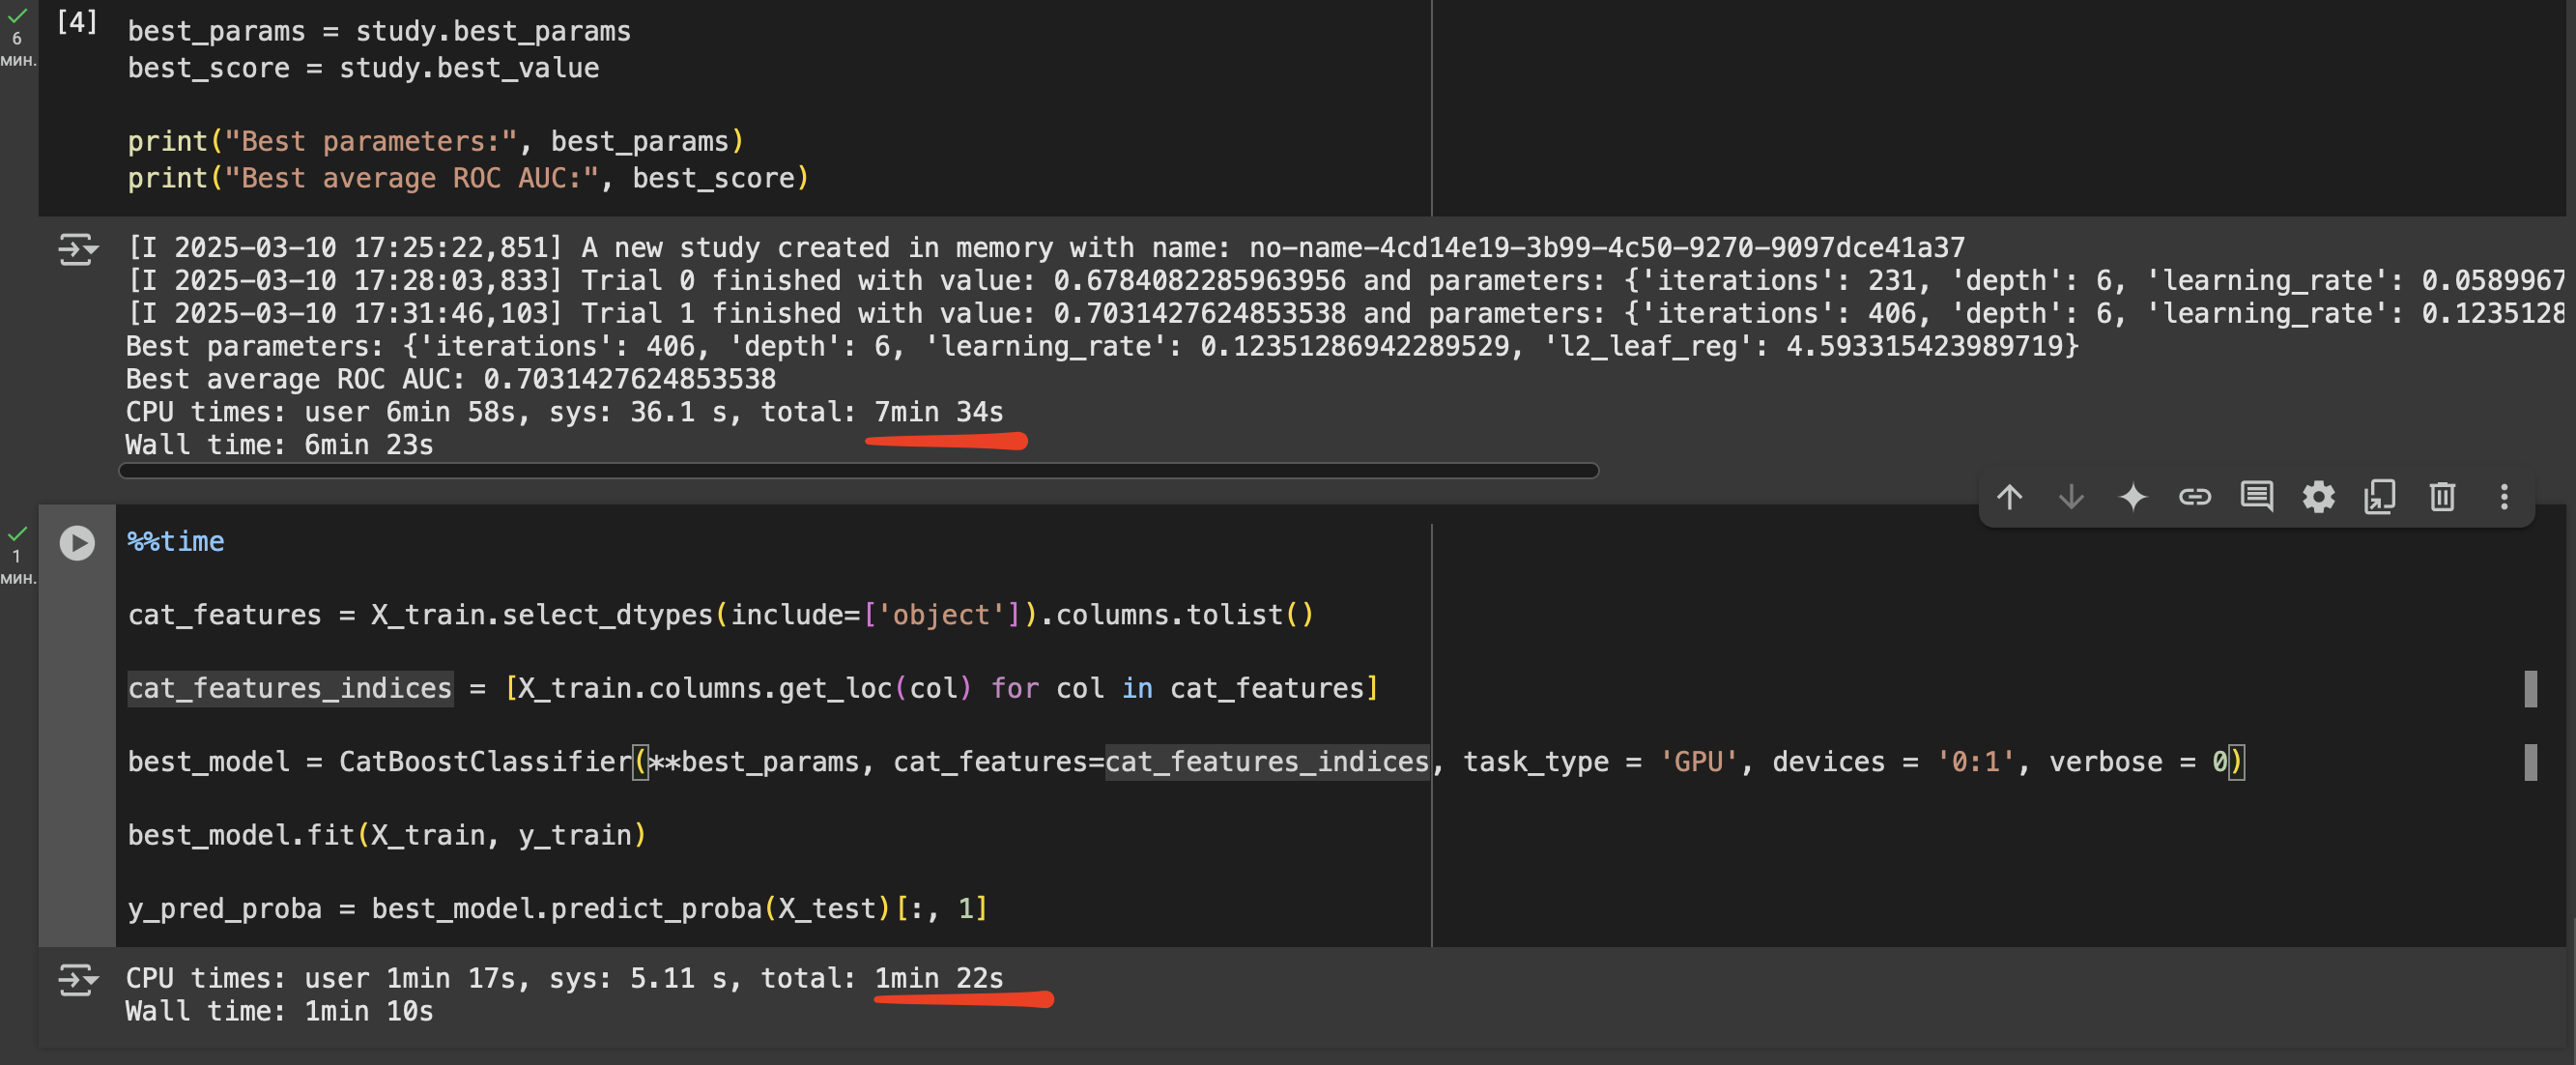

# **Бонус: за Kaggle и стремление к хорошим скорам (2 балла)**

В этом домашнем задании Ваша цель - не просто выполнить шаги выше, но и построить максимально хорошую по качеству модель.

**К 10 вы можете получить до двух дополнительных баллов:**

* За попадание в топ-20% на private leaderboard — +1 дополнительный балл к оценке
* За попадание в топ-5 мест на private leaderboard — + еще один дополнительный балл к оценке (то есть суммарно 2 дополнительных балла)

**ВАЖНО!!!**

Эти баллы ставятся до мягкого дедлайна по соревнованию. После мягкого дедлайна лидерборд не обновляется, и дополнительные баллы не ставятся.

Успехов!

In [ ]:
# не забудьте прикрепить скриншоты лидерборда, пожалуйста